# Code: Dealing with Missing Data
## Created by: Ji Won Chung & Ji Young Yun CSC 390 


Tells matplotlib to display images inline instead of a new window

In [1]:
%matplotlib inline

#packages required to import 
import numpy as np
import pandas as pd
import statsmodels.api as sm

### Determining if NaN values are Filled

Before we begin, we created a function to check if the dataframe's NaN values were filled in or not. 

In [2]:
def isFilledNa(dataframe):
    print(dataframe.isnull().sum())

### The Dataset with Missing Values (NaN)

The dataset with the missing values is called df_missing

In [3]:
df_missing = pd.read_csv('data.csv') #the data set with 6 missing values
#print(df_missing.head())
print(isFilledNa(df_missing))

Channel             0
Region              0
Fresh               0
Milk                1
Grocery             2
Frozen              0
Detergents_Paper    2
Delicassen          1
dtype: int64
None


### The Real/Actual Dataset

 The dataset with the actual values is called df_real

In [4]:
df_real = pd.read_csv('realData.csv')
df_real.head()
print(isFilledNa(df_real))

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
None


### Dropping Observations with NaN

The dataset that drops the observations with missing values is called df_droppedNA

In [5]:
df_droppedNA = df_missing.drop([75, 172, 180, 225, 274, 370]) 
df_droppedNA.head()
print(isFilledNa(df_real))

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
None


### Filling In with the Mean 

The dataset that fills the six missing values with the mean is called df_mean. We found two ways to do this method -- one is a more manual approach, another is using the sklearn.preprocessing Imputer class 

Method 1: Filling the six values with the mean manually 

In [6]:
df_filledNA = df_missing.fillna(df_missing.mean())
print(isFilledNa(df_filledNA))

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
None


Method2: Filling the six values with the mean using the statsmodels package

In [7]:
from pandas import read_csv
from sklearn.preprocessing import Imputer

dataset = read_csv('data.csv')
values = dataset.values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
df_filledNA2 = pd.DataFrame(data = transformed_values)
df_filledNA2.columns = df_missing.columns
print(isFilledNa(df_filledNA2))

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
None


### MICE (Multiple Imputationsby Chained Equations)

The dataset that fills in the missing values using Multiple Imputation by
Chained Equations using the fancyimpute MICE class -- 5000 imputations were done <thus, the program may take a little bit to load> -- and this dataset is called df_mice 

In [8]:
from fancyimpute import MICE
df_mice = MICE( n_imputations = 5000).complete(df_missing.as_matrix())
df_mice = pd.DataFrame(data = df_mice)
df_mice.columns = df_missing.columns
print(isFilledNa(df_mice))

[MICE] Completing matrix with shape (440, 8)
[MICE] Starting imputation round 1/5010, elapsed time 0.001
[MICE] Starting imputation round 2/5010, elapsed time 0.011
[MICE] Starting imputation round 3/5010, elapsed time 0.014
[MICE] Starting imputation round 4/5010, elapsed time 0.017
[MICE] Starting imputation round 5/5010, elapsed time 0.019
[MICE] Starting imputation round 6/5010, elapsed time 0.021
[MICE] Starting imputation round 7/5010, elapsed time 0.024
[MICE] Starting imputation round 8/5010, elapsed time 0.026
[MICE] Starting imputation round 9/5010, elapsed time 0.028
[MICE] Starting imputation round 10/5010, elapsed time 0.030
[MICE] Starting imputation round 11/5010, elapsed time 0.032
[MICE] Starting imputation round 12/5010, elapsed time 0.034
[MICE] Starting imputation round 13/5010, elapsed time 0.035
[MICE] Starting imputation round 14/5010, elapsed time 0.036
[MICE] Starting imputation round 15/5010, elapsed time 0.037
[MICE] Starting imputation round 16/5010, elapsed

# Display: Comparisons with the Correct Values with Visualizations

### Statistical Summaries 

We will view the statistical summaries of the columns with NaN values and see 
which method seems to provide a similar statistical summary. Although this is 
not completely indicative of the strength of the data it is the first step of
determining what type of impact filling in the dataset's missing values had. Note that the list of columnsWithNaN do not include the categories with
completely filled values because their statistics will not be affected when we use the dataframe.describe() function.

In [9]:
columnsWithNaN = ['Milk', 'Grocery', 'Detergents_Paper', 'Delicassen']

In [10]:
df_missing[columnsWithNaN].describe()

,Milk,Grocery,Detergents_Paper,Delicassen
count,439.000000,438.000000,438.000000,439.000000
mean,5795.719818,7972.655251,2891.719178,1525.717540
std,7388.788560,9517.027646,4776.332439,2823.267359
min,55.000000,137.000000,3.000000,3.000000
25%,1532.000000,2155.500000,256.250000,407.500000
50%,3620.000000,4755.500000,820.500000,964.000000
75%,7196.500000,10675.250000,3948.000000,1821.500000
max,73498.000000,92780.000000,40827.000000,47943.000000


In [11]:
df_real[columnsWithNaN].describe()

,Milk,Grocery,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000
mean,5796.265909,7951.277273,2881.493182,1524.870455
std,7380.377175,9503.162829,4767.854448,2820.105937
min,55.000000,3.000000,3.000000,3.000000
25%,1533.000000,2153.000000,256.750000,408.250000
50%,3627.000000,4755.500000,816.500000,965.500000
75%,7190.250000,10655.750000,3922.000000,1820.250000
max,73498.000000,92780.000000,40827.000000,47943.000000


In [12]:
df_droppedNA[columnsWithNaN].describe()

,Milk,Grocery,Detergents_Paper,Delicassen
count,434.000000,434.000000,434.000000,434.000000
mean,5826.762673,8000.421659,2906.887097,1526.020737
std,7423.721452,9553.341671,4794.665933,2838.043624
min,55.000000,137.000000,3.000000,3.000000
25%,1531.000000,2155.500000,256.250000,405.250000
50%,3627.000000,4755.500000,820.500000,962.500000
75%,7234.500000,10699.250000,3992.500000,1811.250000
max,73498.000000,92780.000000,40827.000000,47943.000000


In [13]:
df_filledNA[columnsWithNaN].describe()

,Milk,Grocery,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.00000
mean,5795.719818,7972.655251,2891.719178,1525.71754
std,7380.368285,9495.324020,4765.439991,2820.04996
min,55.000000,137.000000,3.000000,3.00000
25%,1533.000000,2156.500000,256.750000,408.25000
50%,3627.000000,4785.500000,823.000000,965.50000
75%,7190.250000,10655.750000,3922.000000,1820.25000
max,73498.000000,92780.000000,40827.000000,47943.00000


In [14]:
df_mice[columnsWithNaN].describe()

,Milk,Grocery,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000
mean,5796.832899,7958.402289,2883.312663,1522.848185
std,7380.405217,9499.045086,4767.098929,2820.692181
min,55.000000,137.000000,3.000000,3.000000
25%,1533.000000,2156.500000,256.750000,405.750000
50%,3627.000000,4755.500000,820.500000,962.500000
75%,7190.250000,10655.750000,3922.000000,1820.250000
max,73498.000000,92780.000000,40827.000000,47943.000000


### Visualizations of Statistical Summaries: Boxplots 

The tables from the describe() are loaded with too much numeric content. 
It is a poor visualization of the data to compare. Thus, we created a boxplot 
function that given a category, plots out the boxplot statistics of ea category. We ignored the outliers because they made the boxplots really skewed and wasn't helping our comparisons/.

In [15]:
def boxplotMaker(category):
    combineDf = pd.DataFrame({'df_missing': df_missing[category],
                         'df_real': df_real[category],
                         'df_droppedNA' : df_droppedNA[category],
                         'df_filledNA': df_filledNA[category],
                         'df_mice': df_mice[category]})
    plot = combineDf.boxplot(rot = 30, showfliers=False) 
    plot.set_xlabel("Dataset Types")
    plot.set_ylabel(category)
    plot.set_title(category + " by Dataset Types")

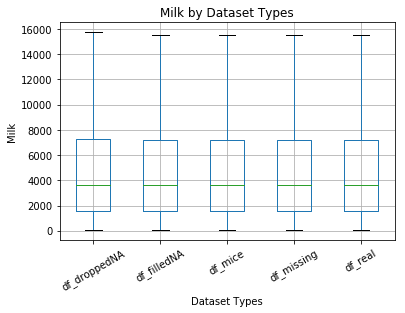

In [16]:
boxplotMaker('Milk')

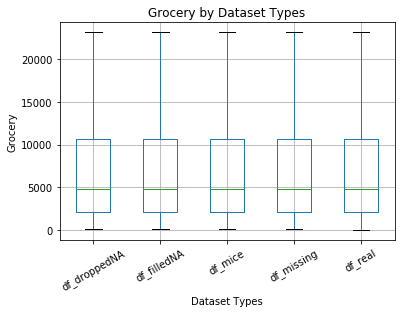

In [17]:
boxplotMaker('Grocery')

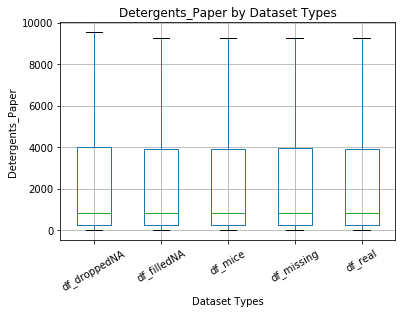

In [18]:
boxplotMaker('Detergents_Paper')

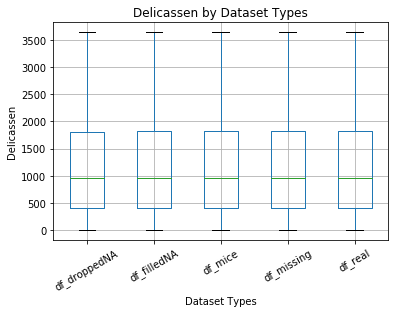

In [19]:
boxplotMaker('Delicassen')

The boxplots all look more or less very similar. This may could be an indication that our methods did not change the overall statistcal distribution of the data. Another possibility is that perhaps our methods just yielded very similar results because perhaps the underlying algorithms of filling in the data with the mean, the MICE, and dropping the NaN values had little affect on the overall distribution of the data. Conversely, it could mean that the algorithms were presenting the same results as the real data (which we will delve into later). It could also be an indication that the underlying algorithms were just very similar in effect. It could also just be the case that the data that we were using just did not matter to the original distribution to begin with. It could also mean that these boxplots reveal little when comparing datasets and is not necessarily what we want to look at -- perhaps we want to look at the relationship between two variables. In conclusion, we really cannot tell whether the way we fit our data using these boxplots were effective or not.  

### Visualizations: Scatter Plot
Using the variables Milk, Fresh, Detergents_Paper, Frozen, and Delicassen, we tried building scatterplots to see the relationships between two of the variables. For each relationship, we created two scatterplots: one compared the data filled with the mean substitution method and the real value, and the other compared the data filled with MICE imputation method and the real value. However, it was difficult to see the difference between the two plots for each of the relationships. 

In [29]:
import matplotlib.pyplot as plt

In [30]:
def compareScatter(df1, df2, predictor, response):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(df1[predictor], df1[response], s=10, c='b', marker="s", label=predictor)
    ax1.scatter(df2[predictor],df2[response], s=10, c='r', marker="o", label=response)
    plt.legend(loc='upper left');
    plt.show()

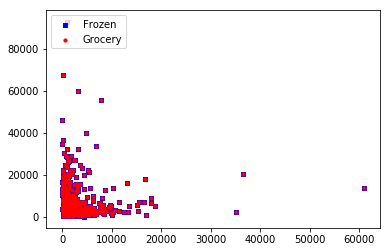

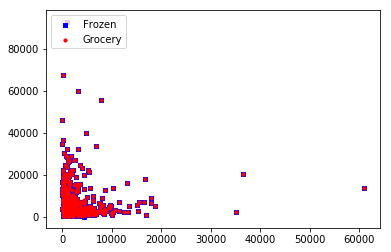

In [31]:
compareScatter(df_real, df_mice, 'Frozen', 'Grocery')
compareScatter(df_real, df_filledNA, 'Frozen', 'Grocery')

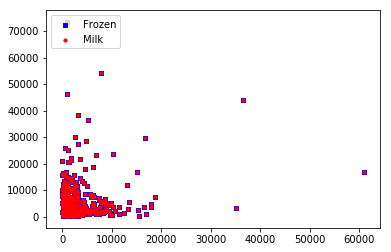

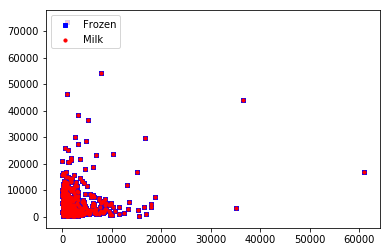

In [32]:
compareScatter(df_real, df_mice, 'Frozen', 'Milk')
compareScatter(df_real, df_filledNA, 'Frozen', 'Milk')

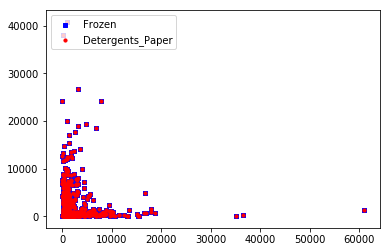

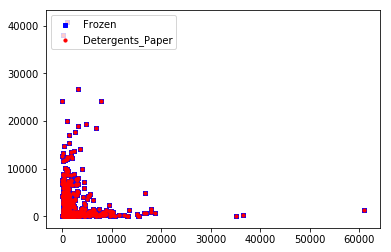

In [33]:
compareScatter(df_real, df_mice, 'Frozen', 'Detergents_Paper')
compareScatter(df_real, df_filledNA, 'Frozen', 'Detergents_Paper')

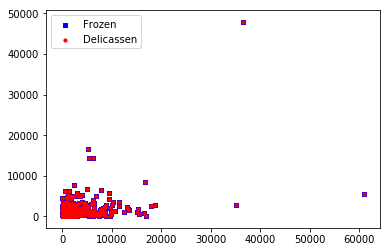

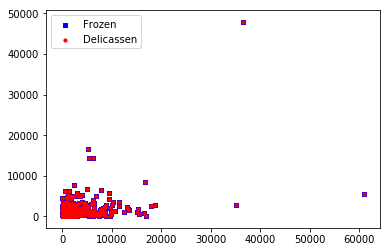

In [34]:
compareScatter(df_real, df_mice, 'Frozen', 'Delicassen')
compareScatter(df_real, df_filledNA, 'Frozen', 'Delicassen')

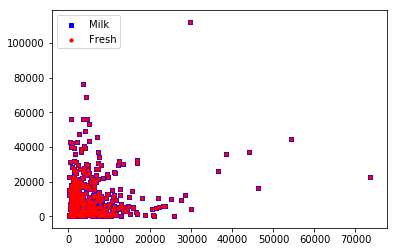

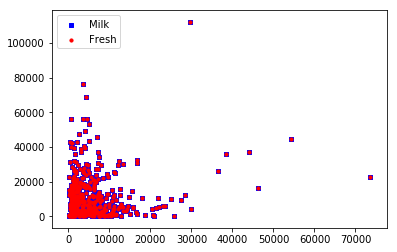

In [35]:
compareScatter(df_real, df_mice, 'Milk', 'Fresh')
compareScatter(df_real, df_filledNA, 'Milk', 'Fresh')

### Visualizations: Linear Regression Model
We also tried building linear regression models between two variables, with Frozen consistently as the response variable. We created three different linear regression models for each relationship, which included the data filled with mean substitution method, the data filled with MICE imputation method, and the actual data. Again, all three of the plots for each relationship looked very similar and it was hard for us to see the differences between them. 


In [36]:
import seaborn as sns

In [37]:
def lmplot(predictor, response, df1, df2, df3):
    sns.lmplot(x=predictor, y=response, data=df1);

    sns.lmplot(x=predictor, y=response, data=df2);

    sns.lmplot(x=predictor, y=response, data=df3);

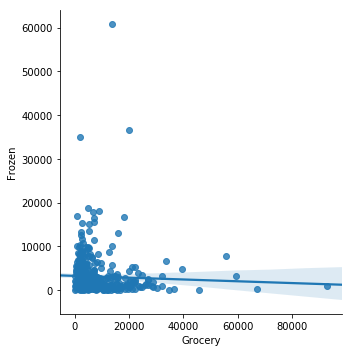

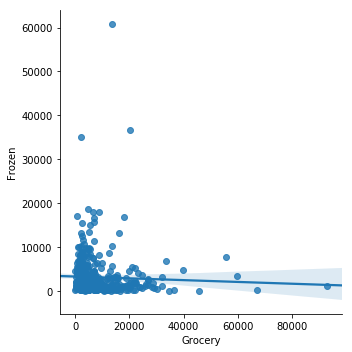

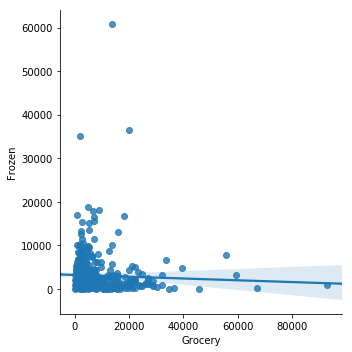

In [38]:
lmplot('Grocery', 'Frozen', df_mice, df_real, df_filledNA)

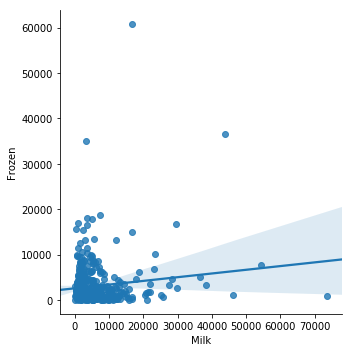

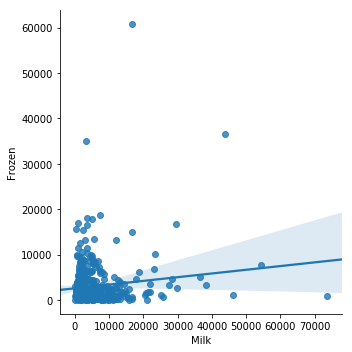

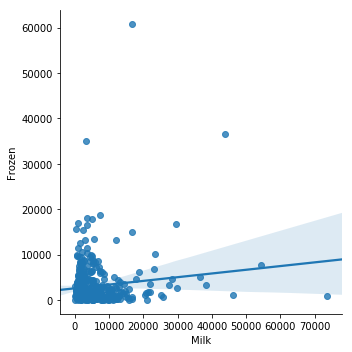

In [39]:
lmplot('Milk', 'Frozen', df_mice, df_real, df_filledNA)

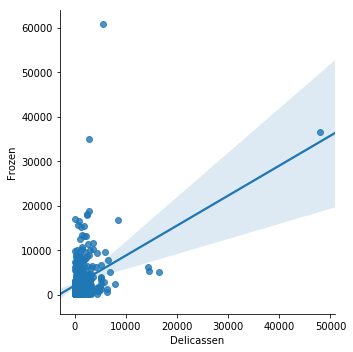

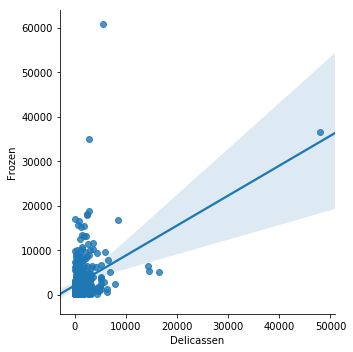

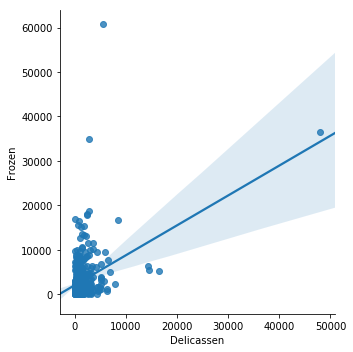

In [40]:
lmplot('Delicassen', 'Frozen', df_mice, df_real, df_filledNA)

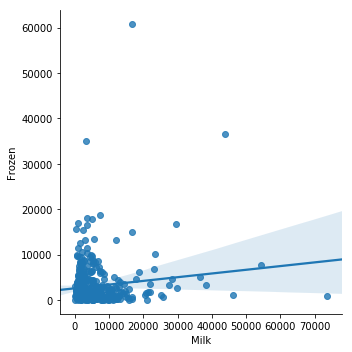

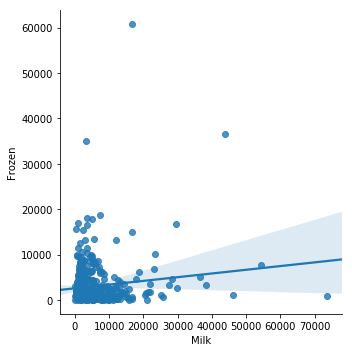

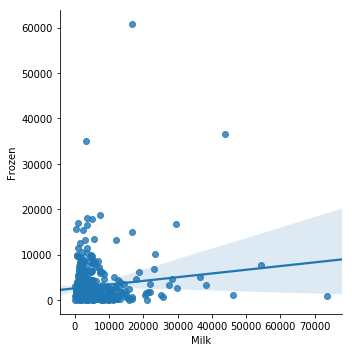

In [41]:
lmplot('Milk', 'Frozen', df_mice, df_real, df_filledNA)

In [42]:
null_data = df_missing[df_missing.isnull().any(axis=1)]

# The Actual Data vs. The Estimated Fillins

Because the plots seem to show no relationships or effect, we decided to just look at the results of the filledNA, mice, and real data to see differences in estimation values. We wanted to clearly see the differences among the filled data with mean substitution method, the filled data with MICE imputation method, the actual data, and the original data with the missing values. We first created a null dataset that had the selected six rows with NAs in any of the columns. Then, we extracted the same rows from the two datasets that got filled in using the methods and the actual dataset. By doing this, we could see by how much the datasets using the two methods were close to the actual values. 


In [43]:
null_data = null_data[columnsWithNaN]
null_data

,Milk,Grocery,Detergents_Paper,Delicassen
75,1137.0,NaN,3.0,975.0
172,5479.0,NaN,2840.0,707.0
180,NaN,8887.0,1382.0,2794.0
225,3243.0,4157.0,NaN,786.0
274,1703.0,1841.0,759.0,NaN
370,3944.0,4955.0,NaN,2235.0


In [44]:
df_filledNA_Summary = df_filledNA.loc[[75, 172, 180, 225, 274, 370]]
df_filledNA_Summary = df_filledNA_Summary[columnsWithNaN]
df_filledNA_Summary

,Milk,Grocery,Detergents_Paper,Delicassen
75,1137.000000,7972.655251,3.000000,975.00000
172,5479.000000,7972.655251,2840.000000,707.00000
180,5795.719818,8887.000000,1382.000000,2794.00000
225,3243.000000,4157.000000,2891.719178,786.00000
274,1703.000000,1841.000000,759.000000,1525.71754
370,3944.000000,4955.000000,2891.719178,2235.00000


In [45]:
df_mice_Summary = df_mice.loc[[75, 172, 180, 225, 274, 370]]
df_mice_Summary = df_mice_Summary[columnsWithNaN]
df_mice_Summary

,Milk,Grocery,Detergents_Paper,Delicassen
75,1137.000000,2443.995900,3.000000,975.000000
172,5479.000000,7230.011208,2840.000000,707.000000
180,6285.475588,8887.000000,1382.000000,2794.000000
225,3243.000000,4157.000000,1299.759801,786.000000
274,1703.000000,1841.000000,759.000000,263.201423
370,3944.000000,4955.000000,784.811779,2235.000000


In [46]:
df_real_Summary = df_real.loc[[75, 172, 180, 225, 274, 370]]
df_real_Summary = df_real_Summary[columnsWithNaN]
df_real_Summary

,Milk,Grocery,Detergents_Paper,Delicassen
75,1137,3,3,975
172,5479,6536,2840,707
180,6036,8887,1382,2794
225,3243,4157,761,786
274,1703,1841,759,1153
370,3944,4955,523,2235


### Visualization: Direct Comparison of the Methods

The tables were hard to parse the data, so we decided to make a visualization that would help us to see the differences between the methods more clearly. 

In [47]:
raw_data = {
           'Milk': [1137, 6036, 1137],
           'GroceryPt1':[2543.259536, 3, 7972.655251],
            'GrocerpyPt2':[7308.697323, 6536, 7972.655251],
           'Detergents_Paper1':[1286.940239, 761, 2891.719178],
           'Detergents_Paper2':[756.676752, 523, 2891.719178],
           'Delicassen':[253.994887, 1153, 1525.71754]}
df = pd.DataFrame(raw_data, columns = ['Milk', 'GroceryPt1', 'GrocerpyPt2', 'Detergents_Paper1',
                                       'Detergents_Paper2', 'Delicassen'])
df = df.T


df.columns = ['MICE','Actual','Mean'] 

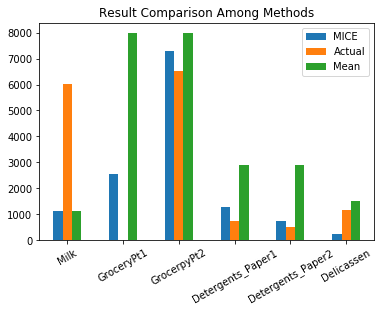

In [48]:
f = df.plot.bar(title='Result Comparison Among Methods', rot = 30)